In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading trainig and test datasets to variables

X_train = pd.read_csv('data/train/X_Train_Data_Input.csv')
Y_train = pd.read_csv('data/train/Y_Train_Data_Target.csv')

X_test = pd.read_csv('data/test/X_Test_Data_Input.csv')
Y_test = pd.read_csv('data/test/Y_Test_Data_Target.csv')

In [3]:
#removing id column in test and training datasets

x_train = X_train.iloc[:,1:]
y_train = Y_train.iloc[:,1:]


x_test = X_test.iloc[:,1:]
y_test = Y_test.iloc[:,1:]
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)


(785133, 1)
(785133, 22)
(261712, 1)
(261712, 22)


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#gettign basic statistcal info on training dataset
x_train.describe()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785124 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   658830 non-null  float64
 4   Column4   657423 non-null  float64
 5   Column5   617953 non-null  float64
 6   Column6   781283 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   781283 non-null  float64
 9   Column9   52996 non-null   float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  419430 non-null  float64
 15  Column15  768677 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

In [6]:
#gettign basic statistcal info on test dataset
x_test.describe()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   261710 non-null  float64
 1   Column1   261712 non-null  int64  
 2   Column2   261712 non-null  float64
 3   Column3   219478 non-null  float64
 4   Column4   219002 non-null  float64
 5   Column5   206053 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   261712 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column9   17859 non-null   float64
 10  Column10  261712 non-null  int64  
 11  Column11  261712 non-null  int64  
 12  Column12  261712 non-null  int64  
 13  Column13  261712 non-null  int64  
 14  Column14  140033 non-null  float64
 15  Column15  256227 non-null  float64
 16  Column16  261712 non-null  float64
 17  Column17  261712 non-null  int64  
 18  Column18  261712 non-null  float64
 19  Column19  261712 non-null  int64  
 20  Colu

In [7]:
#calculating null percentage in each column in training dataset

total = x_train.isnull().sum().sort_values(ascending=False)

percent = (x_train.isnull().sum()/x_train.isnull().count()).sort_values(ascending=False)

train_null_percent_table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

train_null_percent_table

,Total,Percent
Column9,732137,0.932501
Column14,365703,0.465785
Column5,167180,0.212932
Column4,127710,0.162660
Column3,126303,0.160868
Column15,16456,0.020960
Column8,3850,0.004904
Column6,3850,0.004904
Column0,9,0.000011
Column1,0,0.000000


In [8]:
#calculating null percentage in each column in test dataset

total = x_test.isnull().sum().sort_values(ascending=False)

percent = (x_test.isnull().sum()/x_test.isnull().count()).sort_values(ascending=False)

test_null_percent_table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

test_null_percent_table

,Total,Percent
Column9,243853,0.931761
Column14,121679,0.464935
Column5,55659,0.212673
Column4,42710,0.163195
Column3,42234,0.161376
Column15,5485,0.020958
Column8,1234,0.004715
Column6,1234,0.004715
Column0,2,0.000008
Column1,0,0.000000


In [9]:
#cleanign null values using lightgbm in training dataset and test dataset
from algorithm_scripts.null_imputation import lightgbm_impute
x_train = lightgbm_impute(x_train)
x_test = lightgbm_impute(x_test)

In [10]:
#checking for duplicate rows in training dataset
dataset = pd.concat([x_train,y_train],axis=1)
dataset.head()

duplicates = dataset.duplicated(subset=x_train.columns).sum()
print(duplicates)

dataset.drop_duplicates(subset=x_train.columns,inplace=True)
duplicates = dataset.duplicated(subset=x_train.columns).sum()
print(duplicates)

x_train = dataset[x_train.columns]
y_train = dataset[y_train.columns]


12457
0


In [11]:
print(x_train.shape)
print(y_train.shape)

(772676, 22)
(772676, 1)


array([[<Axes: title={'center': 'Column0'}>,
        <Axes: title={'center': 'Column1'}>,
        <Axes: title={'center': 'Column2'}>,
        <Axes: title={'center': 'Column3'}>,
        <Axes: title={'center': 'Column4'}>],
       [<Axes: title={'center': 'Column5'}>,
        <Axes: title={'center': 'Column6'}>,
        <Axes: title={'center': 'Column7'}>,
        <Axes: title={'center': 'Column8'}>,
        <Axes: title={'center': 'Column9'}>],
       [<Axes: title={'center': 'Column10'}>,
        <Axes: title={'center': 'Column11'}>,
        <Axes: title={'center': 'Column12'}>,
        <Axes: title={'center': 'Column13'}>,
        <Axes: title={'center': 'Column14'}>],
       [<Axes: title={'center': 'Column15'}>,
        <Axes: title={'center': 'Column16'}>,
        <Axes: title={'center': 'Column17'}>,
        <Axes: title={'center': 'Column18'}>,
        <Axes: title={'center': 'Column19'}>],
       [<Axes: title={'center': 'Column20'}>,
        <Axes: title={'center': 'Column2

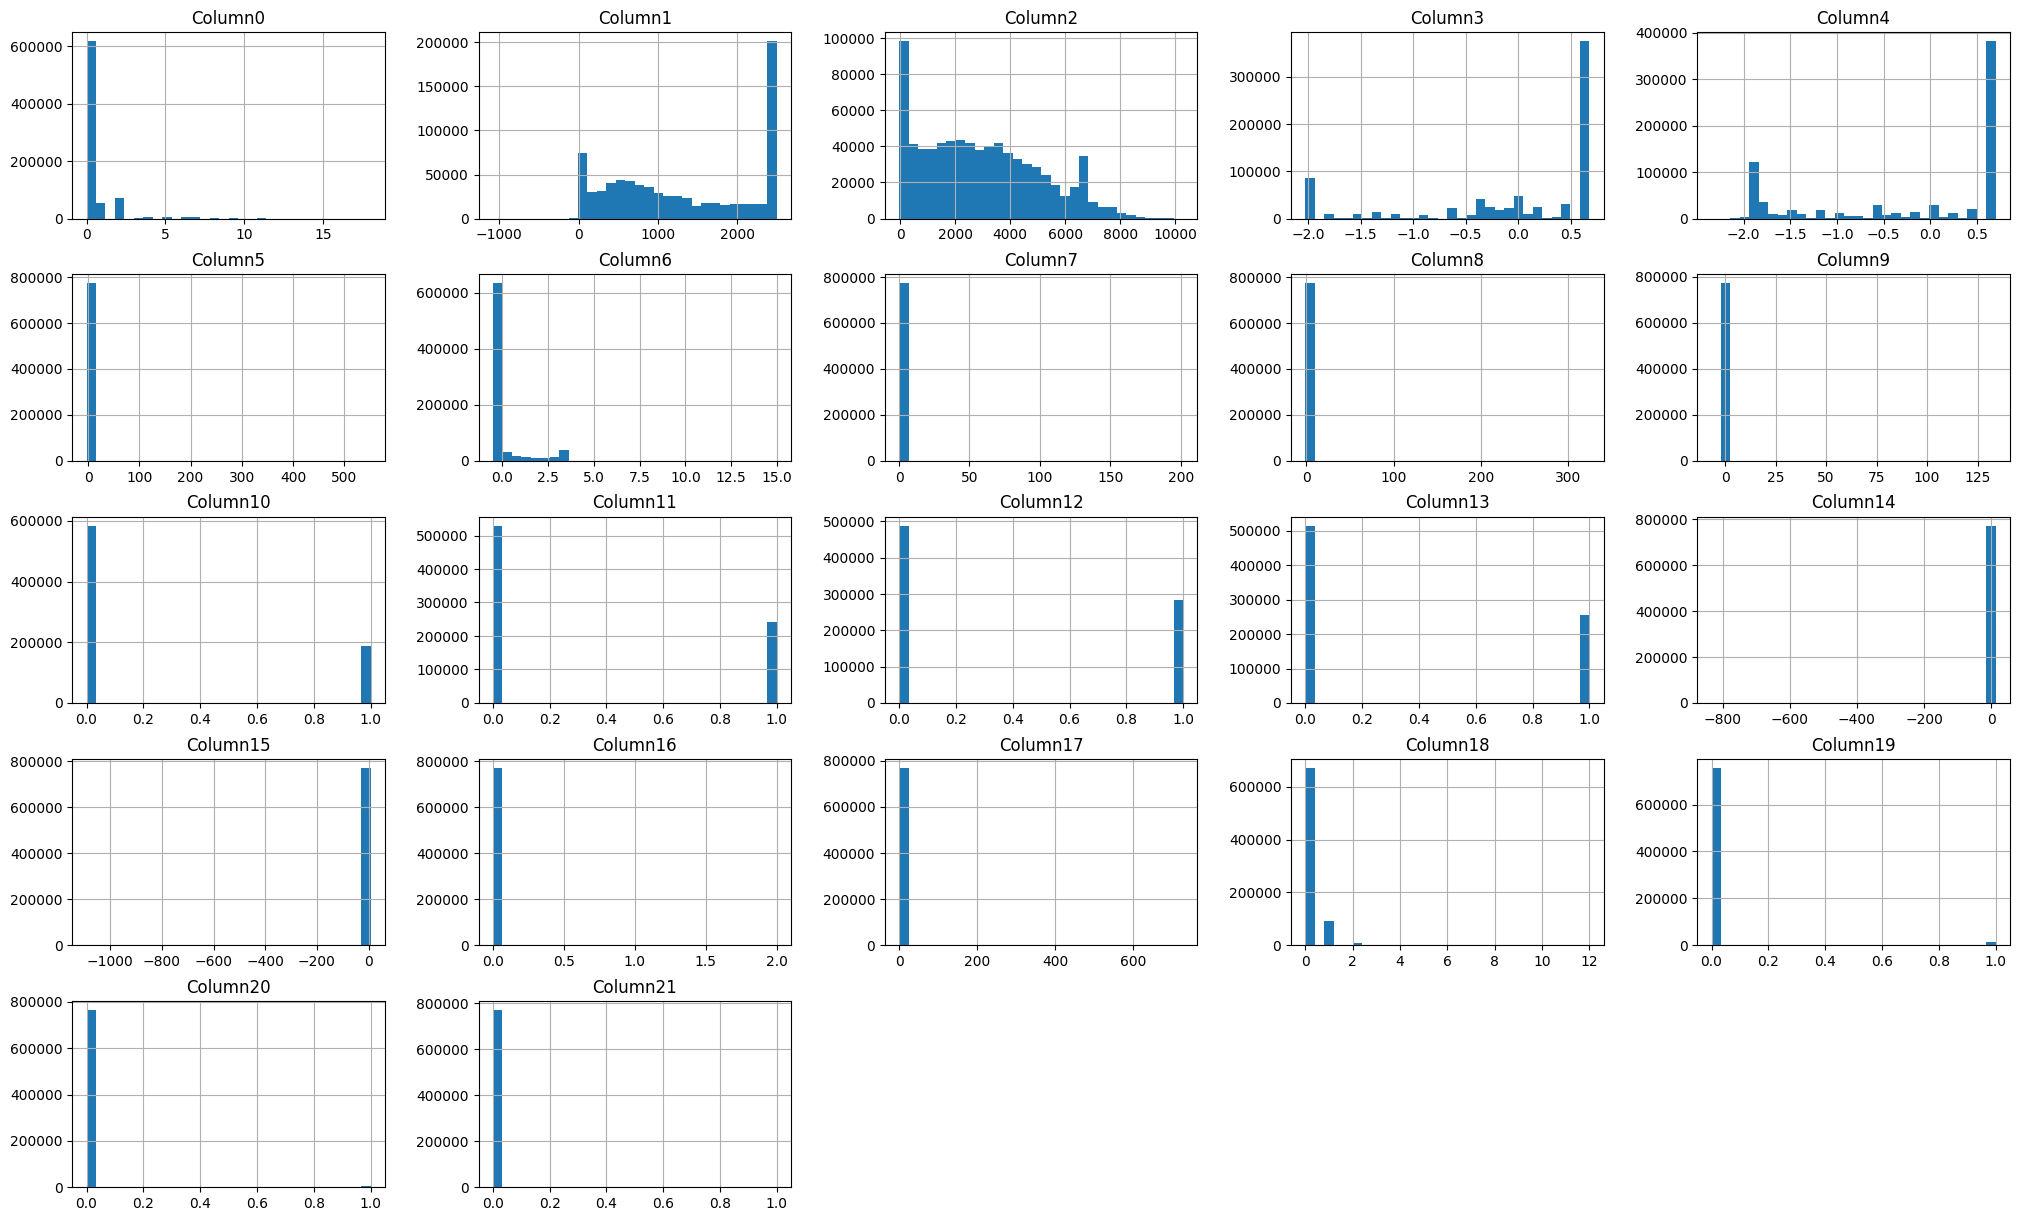

In [12]:
#analyzing or visualizing feature distribution in training dataset
x_train.hist(bins=30,figsize=(25,15))

array([[<Axes: title={'center': 'Column0'}>,
        <Axes: title={'center': 'Column1'}>,
        <Axes: title={'center': 'Column2'}>,
        <Axes: title={'center': 'Column3'}>,
        <Axes: title={'center': 'Column4'}>],
       [<Axes: title={'center': 'Column5'}>,
        <Axes: title={'center': 'Column6'}>,
        <Axes: title={'center': 'Column7'}>,
        <Axes: title={'center': 'Column8'}>,
        <Axes: title={'center': 'Column9'}>],
       [<Axes: title={'center': 'Column10'}>,
        <Axes: title={'center': 'Column11'}>,
        <Axes: title={'center': 'Column12'}>,
        <Axes: title={'center': 'Column13'}>,
        <Axes: title={'center': 'Column14'}>],
       [<Axes: title={'center': 'Column15'}>,
        <Axes: title={'center': 'Column16'}>,
        <Axes: title={'center': 'Column17'}>,
        <Axes: title={'center': 'Column18'}>,
        <Axes: title={'center': 'Column19'}>],
       [<Axes: title={'center': 'Column20'}>,
        <Axes: title={'center': 'Column2

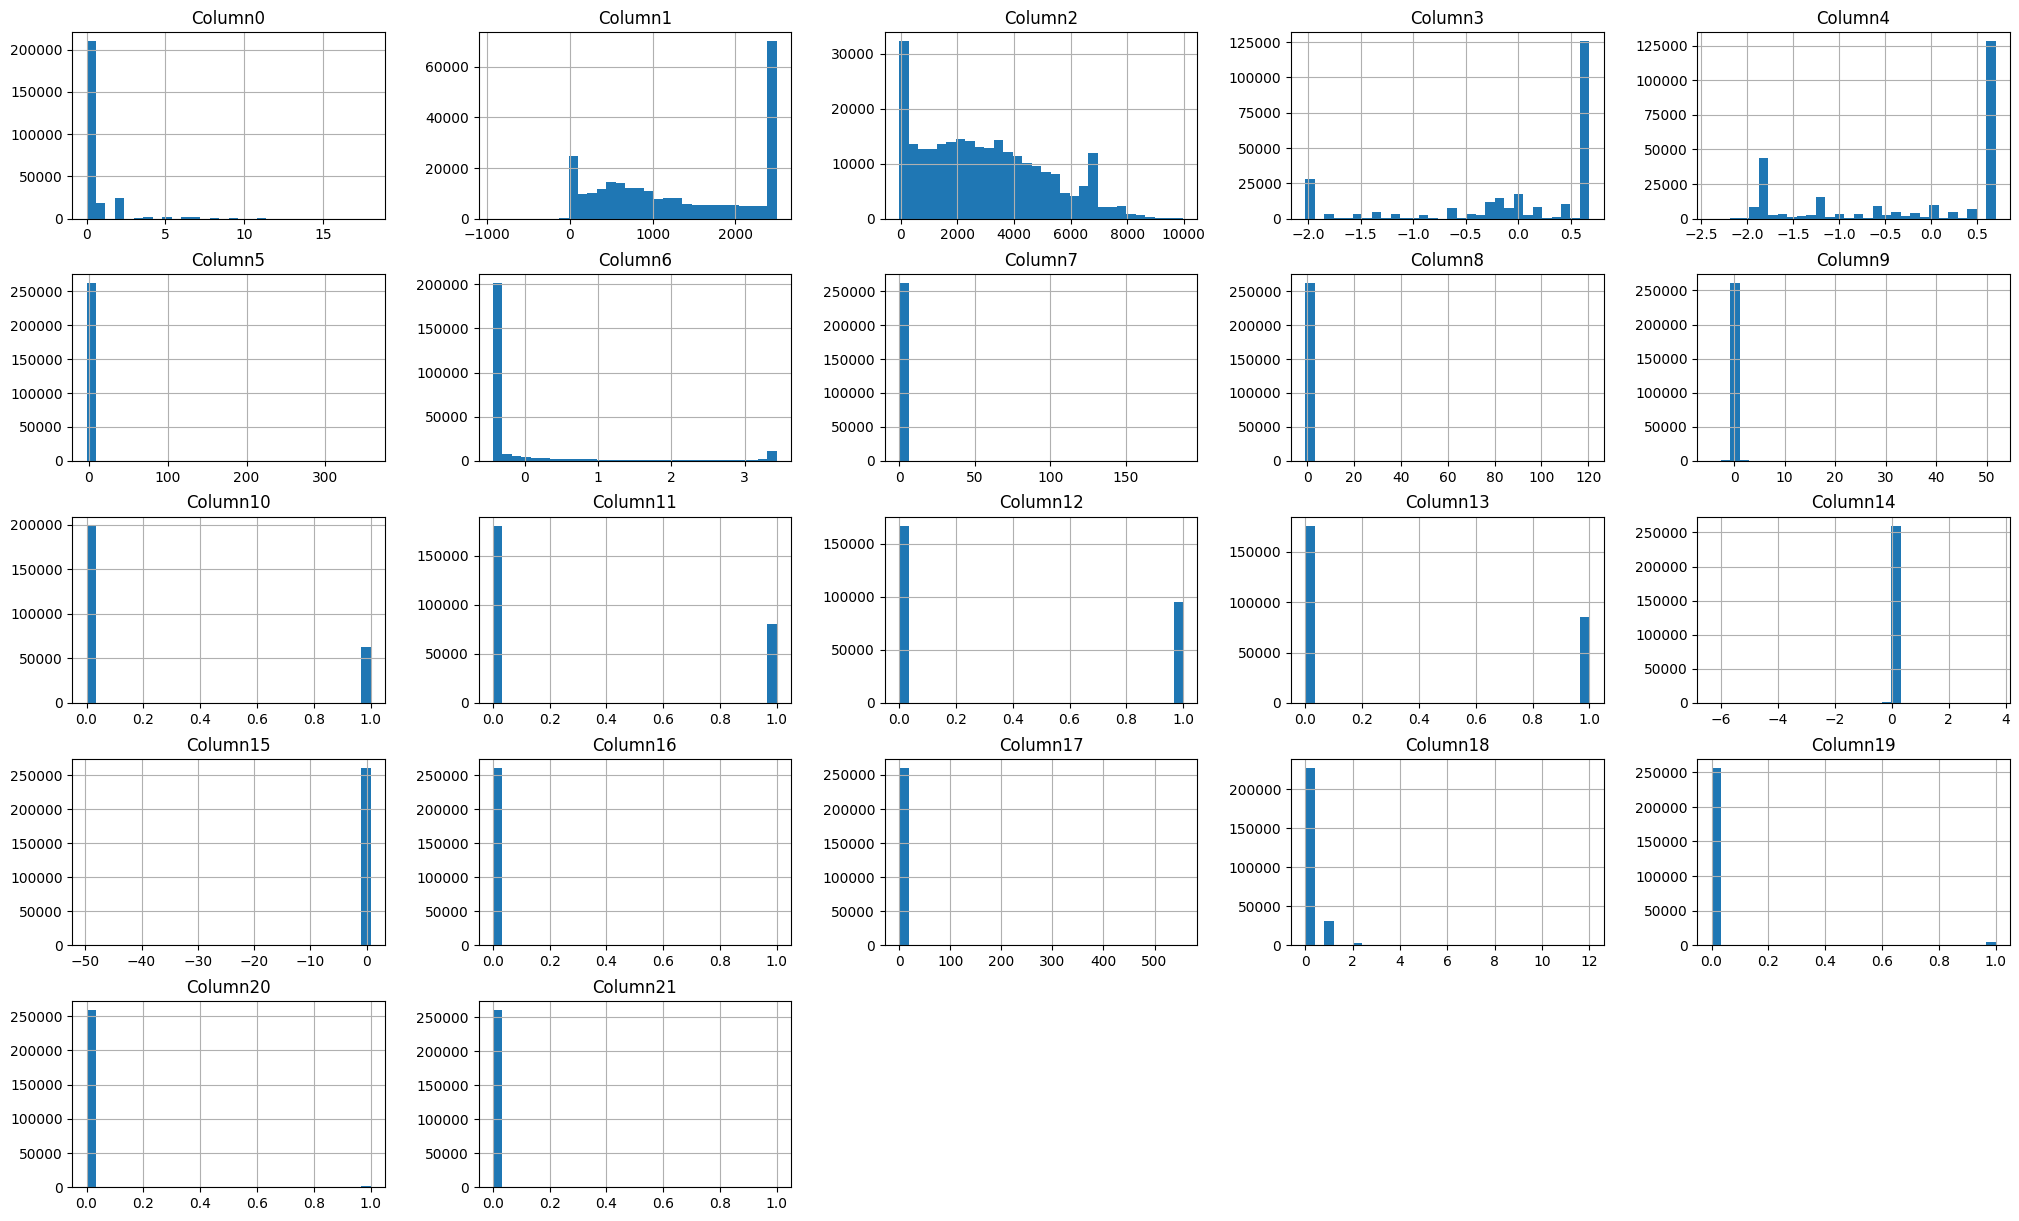

In [13]:
#analyzing or visualizing feature distribution in test dataset
x_test.hist(bins=30,figsize=(25,15))

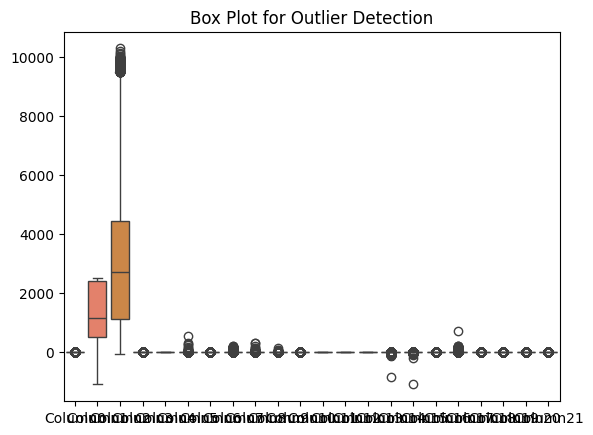

In [14]:
#plotting boxplots for oulier detection in training dataset

sns.boxplot(data=x_train)
plt.title('Box Plot for Outlier Detection')
plt.show()

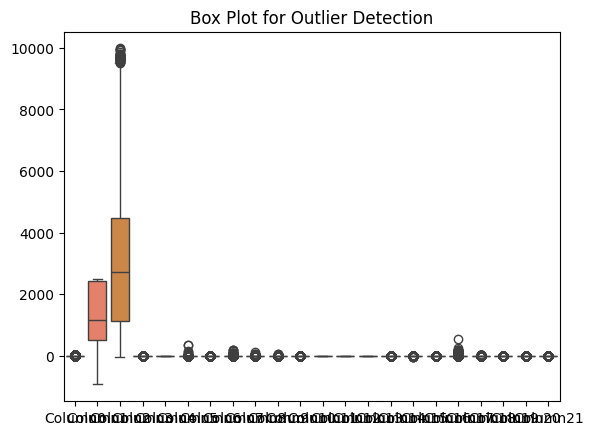

In [15]:
#plotting boxplots for oulier detection in test dataset

sns.boxplot(data=x_test)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [16]:
#checkig the outliers using INTER QUARTILE RANGE in training dataset
from algorithm_scripts.outlier_detection import IQR

outliers = IQR(x_train)
outliers.sum()

Column0     154746
Column1          0
Column2        209
Column3      84806
Column4          0
Column5     159275
Column6     174916
Column7     163025
Column8       2633
Column9      29776
Column10    188023
Column11         0
Column12         0
Column13         0
Column14    171600
Column15    118381
Column16       942
Column17     18367
Column18     99978
Column19     14714
Column20      7342
Column21      2165
dtype: int64

In [17]:
#checkig the outliers using INTER QUARTILE RANGE in testing dataset
from algorithm_scripts.outlier_detection import IQR

outliers = IQR(x_test)
outliers.sum()

Column0     51658
Column1         0
Column2        40
Column3     31957
Column4         0
Column5     56320
Column6     59453
Column7     55167
Column8       915
Column9     37467
Column10    62804
Column11        0
Column12        0
Column13        0
Column14    43334
Column15    39737
Column16      306
Column17     6111
Column18    34229
Column19     4861
Column20     2521
Column21      709
dtype: int64

In [18]:
#treating outliers using iqr method in training dataset

from algorithm_scripts.outlier_detection import iqrImpute
x_train = iqrImpute(x_train)


In [19]:
#treating outliers using iqr method in test dataset

from algorithm_scripts.outlier_detection import iqrImpute
x_test = iqrImpute(x_test)

<Axes: >

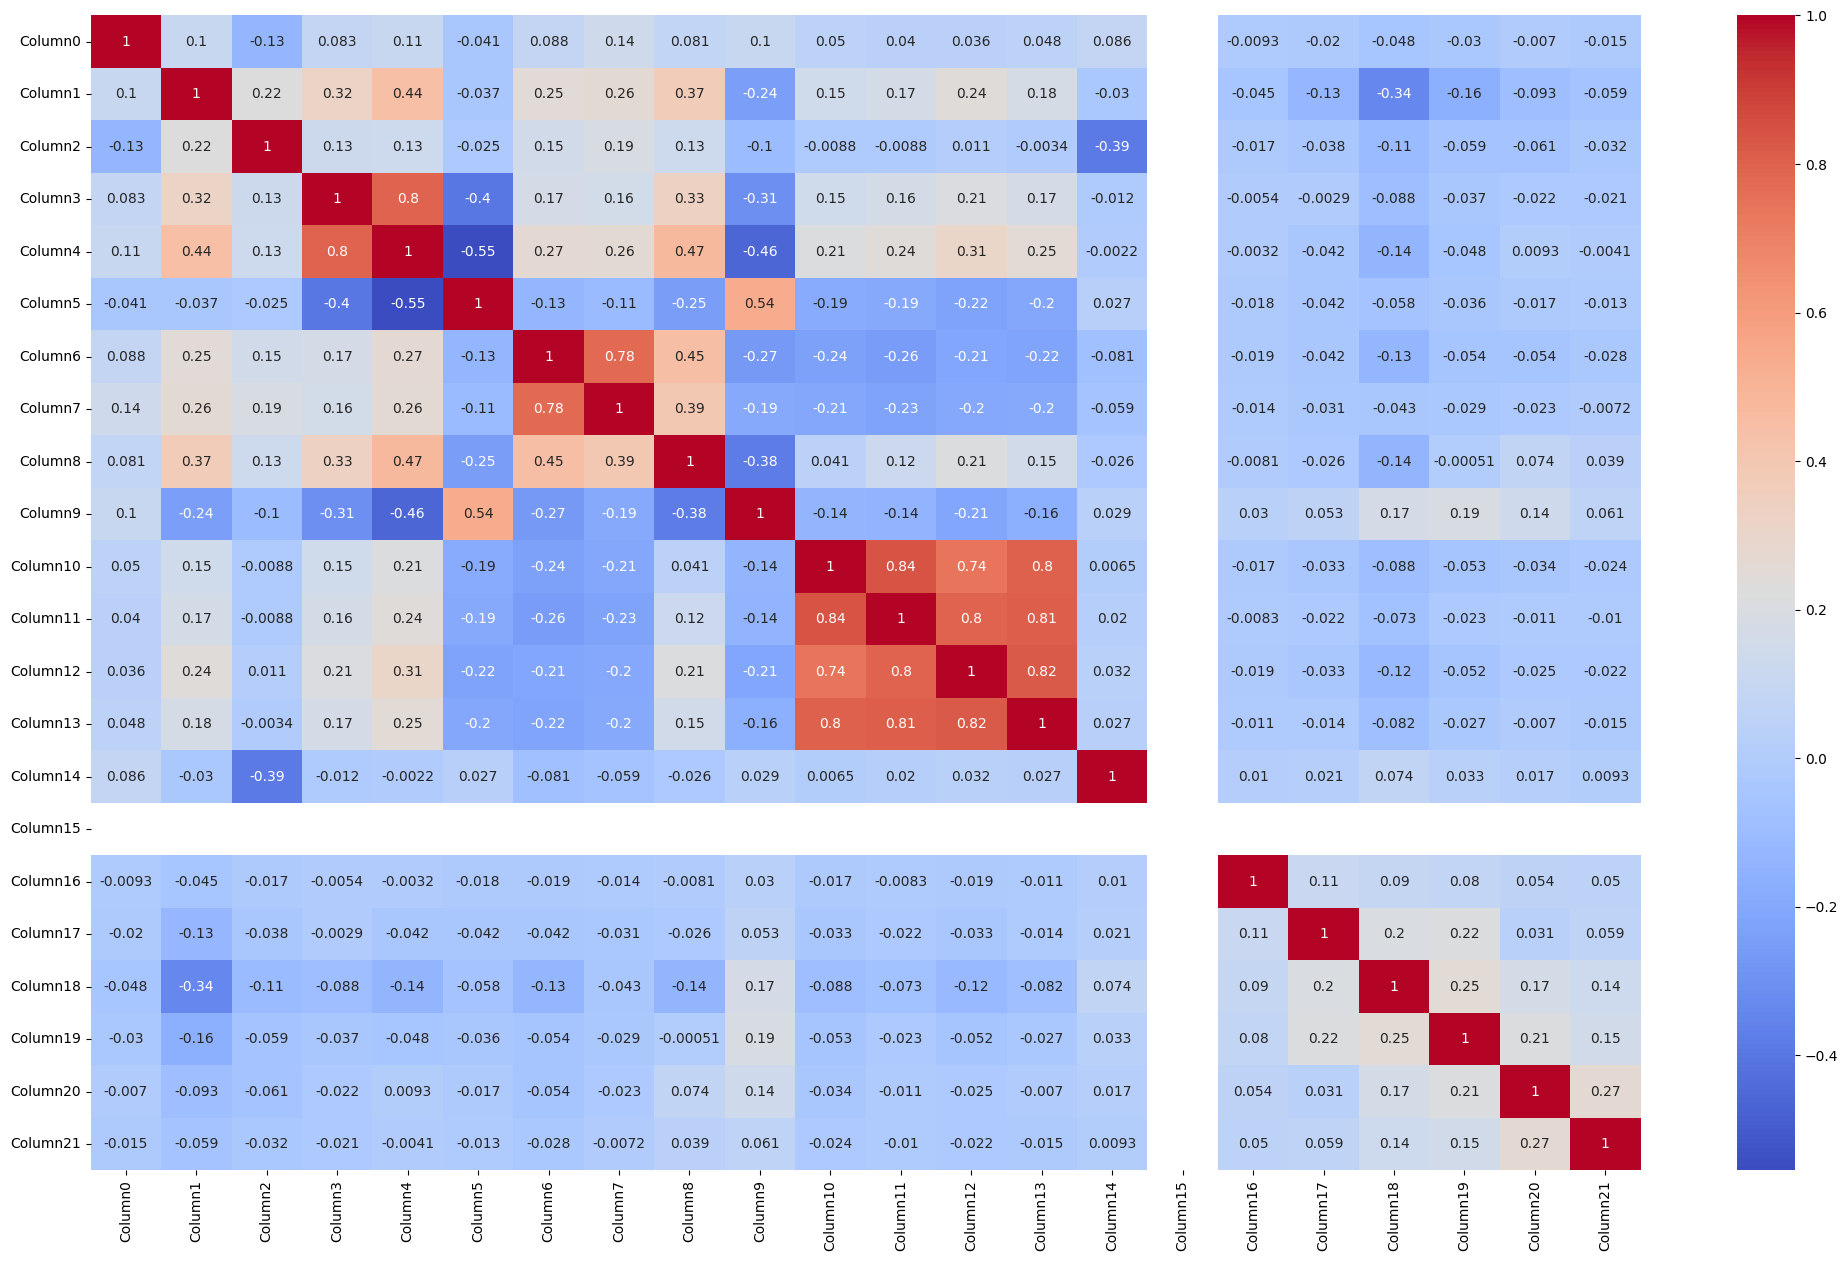

In [20]:
#doing correlation analysis and performing pca on correlated columns on training dataset
corr_marix_train = x_train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_marix_train,annot=True,cmap='coolwarm')

In [21]:
# Create an empty list to store column pairs with correlation > 0.8
high_corr_columns = []

# Iterate over the correlation matrix
for i in range(len(corr_marix_train.columns)):
    for j in range(i):
        if corr_marix_train.iloc[i, j] >= 0.75:  # Check for correlation >= 80% (absolute value)
            colname = corr_marix_train.columns[i]
            high_corr_columns.append(colname)  # Add column to the list

# Remove duplicates from the list
high_corr_columns = list(set(high_corr_columns))

print("Columns with more than 75% correlation:", high_corr_columns)

Columns with more than 75% correlation: ['Column13', 'Column12', 'Column7', 'Column11', 'Column4']


In [22]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_train[high_corr_columns])

data_scaled = pd.DataFrame(data_scaled,columns=high_corr_columns)
data_scaled

x_train = x_train.drop(high_corr_columns,axis=1)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
uncor_cols_train = pca.fit_transform(data_scaled)

variance = pca.explained_variance_ratio_
variance

uncor_cols_train = pd.DataFrame(uncor_cols_train,columns=['PCA_1','PCA_2'])

uncor_cols_train.head()

,PCA_1,PCA_2
0,-1.291406,1.955289
1,-1.291406,1.955289
2,2.175448,-1.301921
3,-1.420252,-1.382171
4,-1.437666,-1.434771


In [24]:

# Ensure indices are aligned before concatenating
x_train.reset_index(drop=True, inplace=True)
uncor_cols_train.reset_index(drop=True, inplace=True)

x_train.head()
x_train = pd.concat([x_train,uncor_cols_train],axis=1)
x_train.head()

,Column0,Column1,Column2,Column3,Column5,Column6,Column8,Column9,Column10,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,PCA_1,PCA_2
0,2.0,2495,3726.0,0.678139,-0.007468,-0.279225,0.606265,-0.080668,0,0.001351,0.00339,0.0,0,0.0,0,0,0,-1.291406,1.955289
1,0.0,2495,3454.0,0.452580,-0.007468,-0.279225,0.329946,-0.084515,0,0.001351,0.00339,0.0,0,0.0,0,0,0,-1.291406,1.955289
2,2.0,2495,4543.0,-1.577453,-0.007469,-0.407939,-0.774979,-0.075830,1,0.001351,0.00339,0.0,0,0.0,0,0,0,2.175448,-1.301921
3,0.0,211,59.0,-0.331445,-0.007466,-0.407939,-0.774979,0.003409,0,0.001351,0.00339,0.0,0,1.0,0,0,0,-1.420252,-1.382171
4,0.0,718,950.0,-1.899331,-0.007466,-0.407939,-0.774979,-0.006882,0,0.001351,0.00339,0.0,0,0.0,0,0,0,-1.437666,-1.434771


<Axes: >

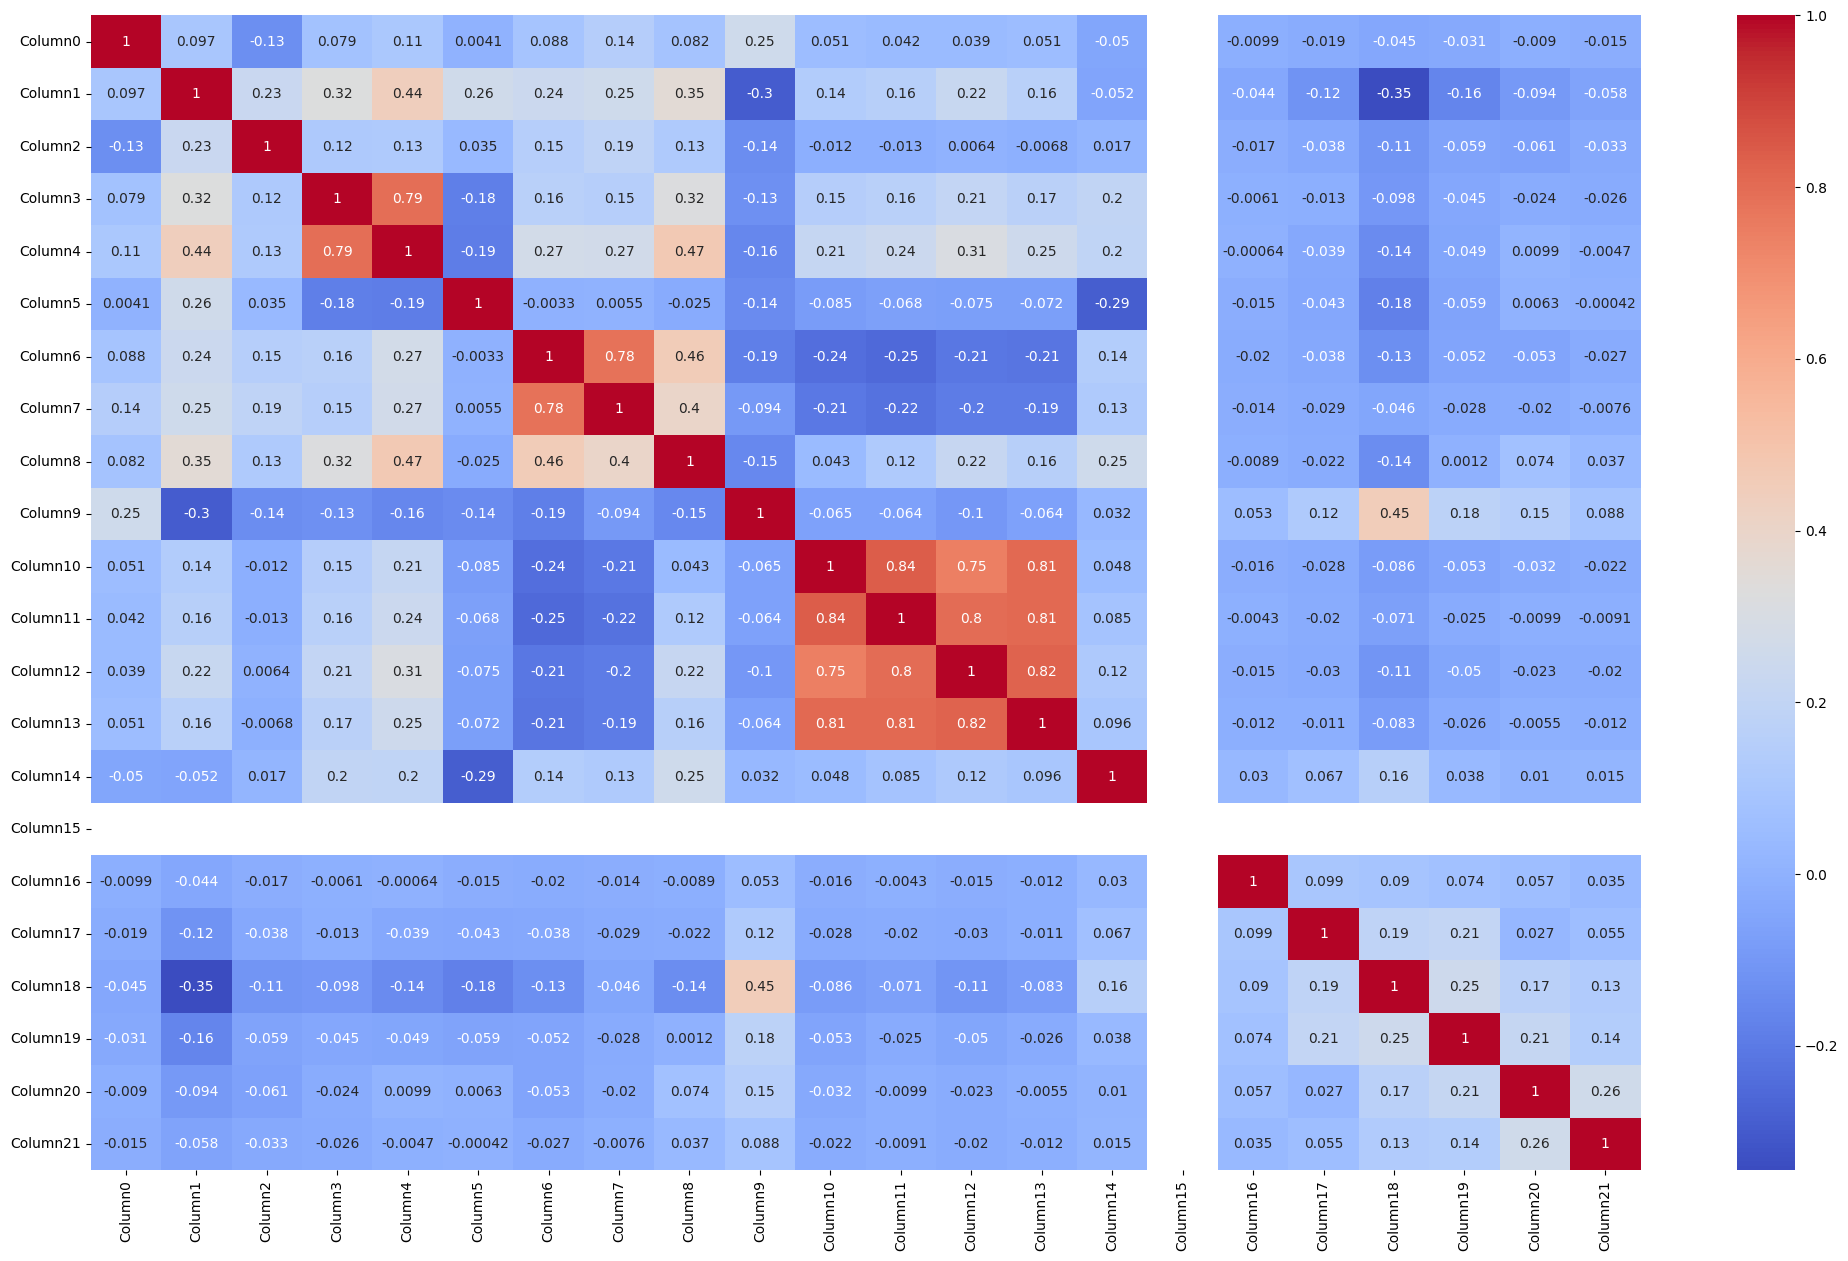

In [25]:
#doing correlation analysis and performing pca on correlated columns on test dataset
corr_marix_test = x_test.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_marix_test,annot=True,cmap='coolwarm')

In [26]:
# Create an empty list to store column pairs with correlation > 0.8
high_corr_columns = []

# Iterate over the correlation matrix
for i in range(len(corr_marix_test.columns)):
    for j in range(i):
        if corr_marix_test.iloc[i, j] >= 0.75:  # Check for correlation >= 80% (absolute value)
            colname = corr_marix_test.columns[i]
            high_corr_columns.append(colname)  # Add column to the list

# Remove duplicates from the list
high_corr_columns = list(set(high_corr_columns))

print("Columns with more than 75% correlation:", high_corr_columns)

Columns with more than 75% correlation: ['Column13', 'Column12', 'Column7', 'Column11', 'Column4']


In [27]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_test[high_corr_columns])


data_scaled = pd.DataFrame(data_scaled,columns=high_corr_columns)


x_test = x_test.drop(high_corr_columns,axis=1)


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
uncor_cols_test = pca.fit_transform(data_scaled)

variance = pca.explained_variance_ratio_
variance

uncor_cols_test = pd.DataFrame(uncor_cols_test,columns=['PCA_1','PCA_2'])

uncor_cols_test.head()

,PCA_1,PCA_2
0,2.650970,0.040072
1,1.466577,0.089628
2,-1.430565,-1.436250
3,1.181232,-0.621013
4,1.727647,0.194995


In [29]:
x_test.reset_index(drop=True, inplace=True)
uncor_cols_test.reset_index(drop=True, inplace=True)


x_test.head()
x_test = pd.concat([x_test,uncor_cols_test],axis=1)
x_test.head()

,Column0,Column1,Column2,Column3,Column5,Column6,Column8,Column9,Column10,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,PCA_1,PCA_2
0,1.0,1986,53.0,0.678139,-0.007469,-0.407939,0.554860,-0.088554,1,0.001351,0.00339,0.0,0,0.0,0,0,0,2.650970,0.040072
1,2.0,1579,12.0,0.678139,-0.007468,-0.407939,0.142149,-0.073451,0,0.001351,0.00339,0.0,0,0.0,0,0,0,1.466577,0.089628
2,0.0,898,3817.0,-1.692102,-0.007467,-0.407939,-0.774979,-0.079884,0,0.001349,0.00339,0.0,0,0.0,0,0,0,-1.430565,-1.436250
3,0.0,79,3449.0,-0.675216,-0.007469,-0.292038,0.635264,-0.074311,0,0.001351,0.00339,0.0,0,0.0,0,0,0,1.181232,-0.621013
4,1.0,646,6510.0,-1.692102,-0.007470,-0.407939,-0.774979,-0.029087,1,0.001349,0.00339,0.0,0,0.0,0,0,0,1.727647,0.194995


In [30]:
print(x_train.shape)
print(x_test.shape)

(772676, 19)
(261712, 19)


In [31]:
print(x_train.isnull().sum().sum())
print(x_test.isnull().sum().sum())

0
0


In [32]:
# #now checking for balancing or imbalancing the dataset using ADASYN (Adaptive Synthetic Sampling Approach)
class_distribution = y_train.value_counts()
print(class_distribution)
from algorithm_scripts.balancing_dataset import smote

balanced_data = smote(x_train,y_train)
x_train = balanced_data[0]
y_train = balanced_data[1]
class_distribution = y_train.value_counts()
print(class_distribution)

target
0         700647
1          72029
Name: count, dtype: int64
target
0         700647
1         700647
Name: count, dtype: int64


In [33]:
print(x_train.shape)
print(y_train.shape)

(1401294, 19)
(1401294, 1)


In [34]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [35]:
#performing cross validation
kfold = KFold(n_splits=8,shuffle=True,random_state=42)
results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')

In [36]:

print(f"Cross-Validation Accuracy Scores: {results}")
print(f"Mean CV Accuracy: {results.mean()}")

Cross-Validation Accuracy Scores: [0.9772268  0.97667873 0.9736758  0.97492036 0.97667302 0.97710691
 0.97860254 0.97698118]
Mean CV Accuracy: 0.9764831667140419


In [37]:
#building with Decision Forest algorithm
from sklearn.tree import DecisionTreeClassifier
model_random = DecisionTreeClassifier()


In [38]:
#performing cross validation
kfold = KFold(n_splits=8,shuffle=True,random_state=42)
results = cross_val_score(model_random,x_train,y_train,cv=kfold,scoring='accuracy')

In [39]:

print(f"Cross-Validation Accuracy Scores: {results}")
print(f"Mean CV Accuracy: {results.mean()}")

Cross-Validation Accuracy Scores: [0.98181683 0.98195956 0.98161131 0.98175403 0.98173691 0.98105754
 0.98136571 0.9815427 ]
Mean CV Accuracy: 0.9816055729185054


In [40]:
#Now trainig the model with training dataset
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [41]:
from algorithm_scripts.metrics import metrics

metrics(y_pred=y_pred,y_test=y_test)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)


Accuracy: 0.97
Precision: 0.74
Recall: 0.99
F1-Score: 0.85
ROC AUC Score: 0.98
[[228631   8403]
 [   350  24328]]


<Axes: >

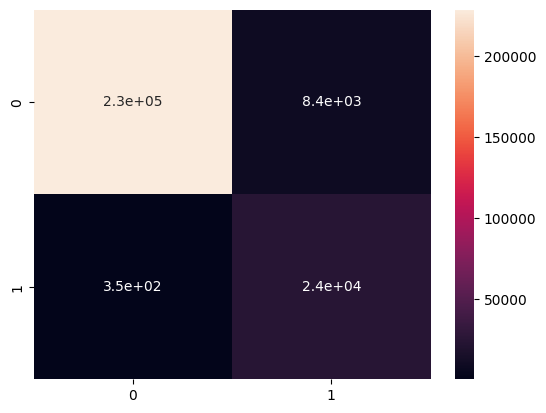

In [42]:
#plotting confusion matrix
sns.heatmap(conf_matrix,annot=True)

In [43]:
model_random.fit(x_train,y_train)
y_pred_dtree = model_random.predict(x_test)
metrics(y_pred=y_pred_dtree,y_test=y_test)

Accuracy: 0.97
Precision: 0.78
Recall: 0.92
F1-Score: 0.84
ROC AUC Score: 0.95


[[230449   6585]
 [  1966  22712]]


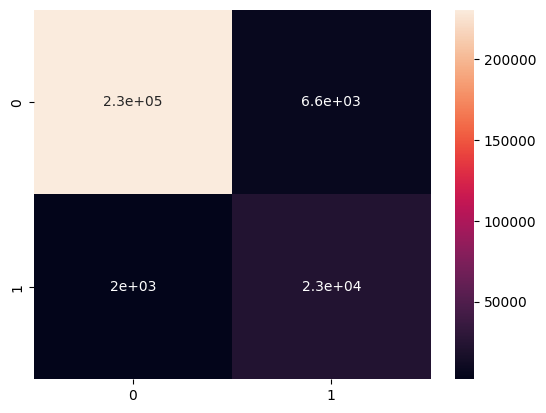

In [44]:
conf_matrix = confusion_matrix(y_test,y_pred_dtree)
sns.heatmap(conf_matrix,annot=True)
print(conf_matrix)

In [45]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)
y_pred_xgb = model.predict(x_test)


Accuracy: 0.97
Precision: 0.78
Recall: 0.98
F1-Score: 0.87
ROC AUC Score: 0.97
[[230429   6605]
 [   572  24106]]


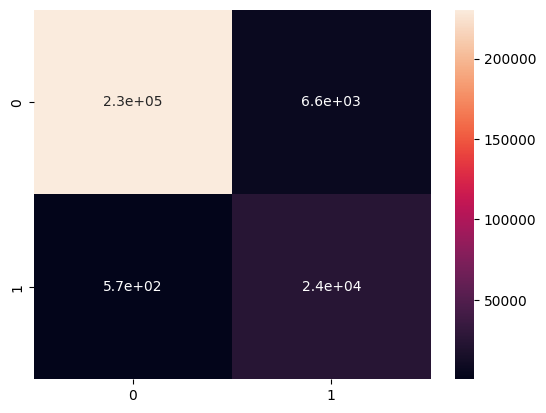

In [46]:
metrics(y_pred=y_pred_xgb,y_test=y_test)
conf_matrix = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(conf_matrix,annot=True)
print(conf_matrix)

In [47]:
#drawing roc curve
y_pred_xgb_proba = model.predict_proba(x_test)[:, 1]
y_pred_xgb_proba

array([4.3424029e-06, 2.3344398e-06, 2.4387135e-05, ..., 1.1621703e-06,
       2.4063083e-05, 6.2227268e-06], dtype=float32)

In [48]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_proba)
roc_auc = auc(fpr,tpr)

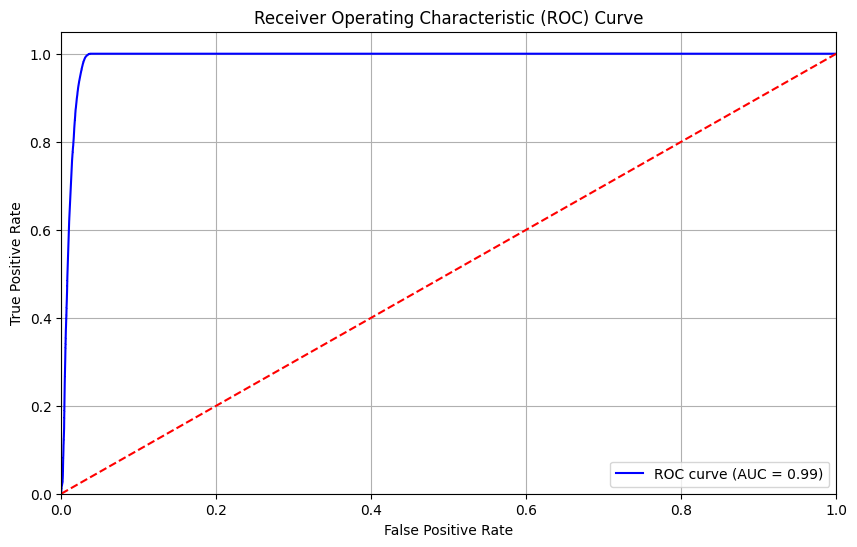

In [49]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
